In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor




In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train  = True ,
    transform= ToTensor(),
    download= True 

)
test_data = datasets.MNIST(
    root = 'data',
    train  = False ,
    transform= ToTensor(),
    download= True 

)

100%|██████████| 9912422/9912422 [00:03<00:00, 3069547.35it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 19764348.80it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 3989691.82it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 290701.31it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
train_data.targets.size()


torch.Size([60000])

In [7]:
train_data.targets


tensor([5, 0, 4,  ..., 5, 6, 8])

In [11]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1),
    'test' : DataLoader(test_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1),                    
}

In [12]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x176a0af3ed0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x176a0af2810>}

In [13]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        self.conv1 = nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)

    def forward(self, x):
        x = F.relu(F.max_pool2d (self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2 (x)
        return F.softmax (x)   



In [27]:
import torch

device = torch.device('cuda' if torch. cuda.is_available() else 'cpu')

model = CNN ().to (device)

optimizer = optim. Adam (model.parameters(), lr=0.001)

loss_fn = nn. CrossEntropyLoss ()

def train(epoch):
      model. train()
      for batch_idx, (data, target) in enumerate(loaders['train']):
            data, target = data.to (device), target.to (device)
            optimizer. zero_grad()
            output = model (data)
            loss  = loss_fn (output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % 20 == 0:
               print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.2f}%)]\t{loss.item():.6f}')

def test():
      model.eval()

      test_loss = 0 
      correct = 0 

      with torch.no_grad():
            for data,target in loaders['test']:
                data , target = data.to(device),target.to(device)
                output = model(data)
                test_loss += loss_fn(output,target).item()
                pred = output.argmax(dim = 1,keepdim = True)
                correct += pred.eq(target.view_as(pred)).sum().item()
      test_loss /= len(loaders['test'].dataset)
      print(f'\nTest set : Average loss : {test_loss:.4f} , Accuracy {correct}/{len(loaders["test"].dataset)}({100. *correct / len(loaders["test"].dataset):.0f}%\n)')

In [28]:
for epoch in range(1, 11):
    train(epoch)
    test()

C:\Users\vedan\AppData\Local\Temp\ipykernel_7996\1595551324.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax (x)


Train Epoch: 1 [0/60000 (0.00%)]	2.303475
Train Epoch: 1 [2000/60000 (3.33%)]	2.274442
Train Epoch: 1 [4000/60000 (6.67%)]	2.110394
Train Epoch: 1 [6000/60000 (10.00%)]	1.998144
Train Epoch: 1 [8000/60000 (13.33%)]	1.891483
Train Epoch: 1 [10000/60000 (16.67%)]	1.830171
Train Epoch: 1 [12000/60000 (20.00%)]	1.835040
Train Epoch: 1 [14000/60000 (23.33%)]	1.814173
Train Epoch: 1 [16000/60000 (26.67%)]	1.755191
Train Epoch: 1 [18000/60000 (30.00%)]	1.775133
Train Epoch: 1 [20000/60000 (33.33%)]	1.751938
Train Epoch: 1 [22000/60000 (36.67%)]	1.665492
Train Epoch: 1 [24000/60000 (40.00%)]	1.745902
Train Epoch: 1 [26000/60000 (43.33%)]	1.725582
Train Epoch: 1 [28000/60000 (46.67%)]	1.761594
Train Epoch: 1 [30000/60000 (50.00%)]	1.678068
Train Epoch: 1 [32000/60000 (53.33%)]	1.656273
Train Epoch: 1 [34000/60000 (56.67%)]	1.695660
Train Epoch: 1 [36000/60000 (60.00%)]	1.677936
Train Epoch: 1 [38000/60000 (63.33%)]	1.636839
Train Epoch: 1 [40000/60000 (66.67%)]	1.721595
Train Epoch: 1 [42000/60

In [30]:
device

device(type='cpu')

Prediction : 4


C:\Users\vedan\AppData\Local\Temp\ipykernel_7996\1595551324.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax (x)


<function matplotlib.pyplot.show(close=None, block=None)>

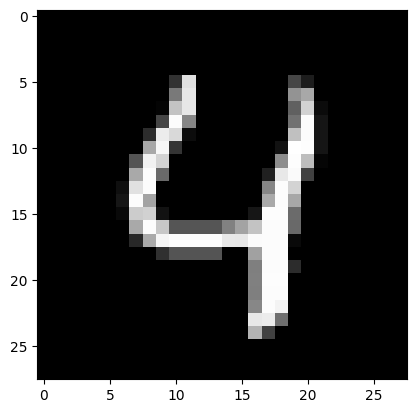

In [44]:
import matplotlib.pyplot as plt
model.eval()
data,target = test_data[4]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim= 1,keepdim =True).item()
print(f'Prediction : {prediction}')
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image,cmap = 'gray')
plt.show